In [ ]:
# Import all the required libraries 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

In [321]:
# We are going to implement the same steps as we did in Perceptron from scratch but we will write 
# the code according to the Gradient Descent Algortithm applied to it . 

# First we will make the dataset using make_classfication

X , y = make_classification(
                             n_samples=100, # No of rows
                             n_features=2, # No of columns
                             n_redundant=0, # No of redundant columns
                             n_classes=2, # No of labels for output
                             n_clusters_per_class=1, # No of clusters per label
                             n_informative=1, # No of useful features
                             hypercube=False, 
                             class_sep=10, # Seperation dist between the clusters
                             random_state=54 # Number for replicating this state
)

In [ ]:
X.shape,y.shape # Examine the shape

((100, 2), (100,))

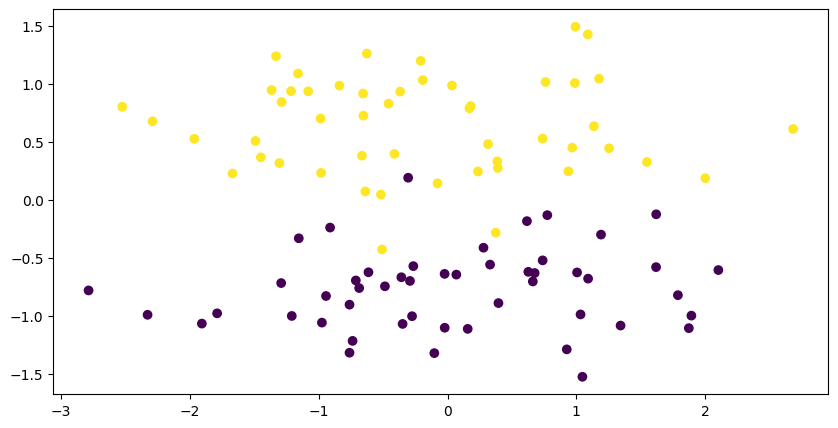

In [323]:
# Now lets check the graph state before ascending 
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1:],c=y)
plt.show()

In [324]:
# Now first we will do the steps for Logistic Regression and then do the same for Our Gradeint Descent Logistic Regression from scratch

In [ ]:
# Instantiate the model
lor = LogisticRegression(solver='sag',penalty=None) # We made some modifications to match our GD from scratch algo.

In [326]:
lor.fit(X,y) # Fit the models with inputs and outputs

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
lor.intercept_,lor.coef_ # For analysis and comparision

(array([0.84455421]), array([[-0.46400076,  7.92577837]]))

In [328]:
# Calculating m and b for this 
m_lor = - (lor.coef_[0][0]/lor.coef_[0][1])
b_lor = - (lor.intercept_/lor.coef_[0][1])

In [329]:
# To make a line and use the coeffecient we calculate and insert in the graph we made above to check the result
x_in_lor = np.linspace(-3,3,X.shape[0]) # ( boundary ,  boundary2 ,(no of points in between the two boundaries) size )
y_in_lor = (m_lor*x_in_lor) + b_lor

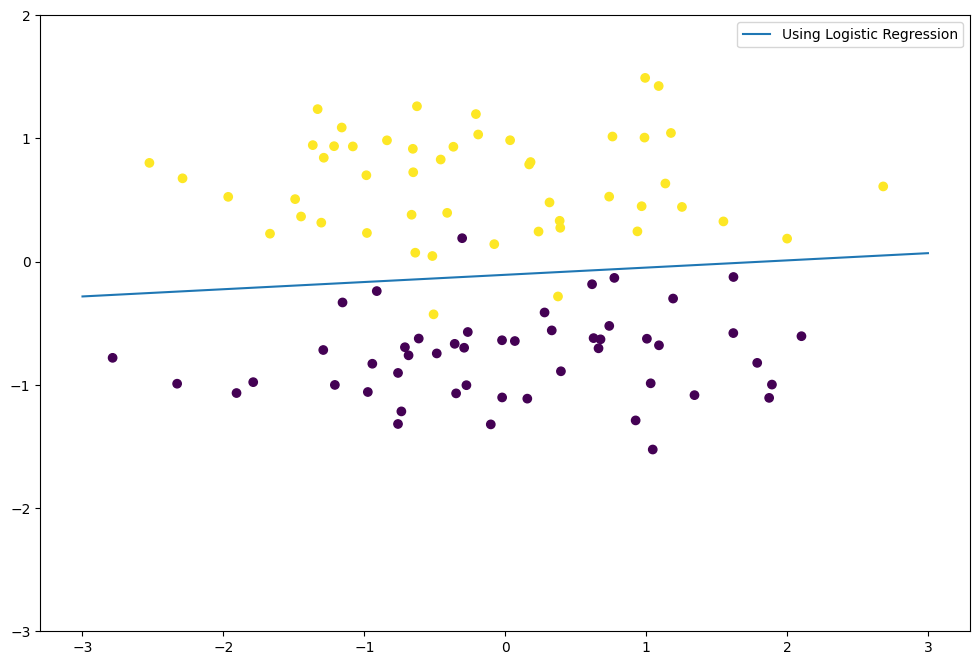

In [330]:
# Now plotting the line with the scaterr plot
plt.figure(figsize=(12,8))
plt.plot(x_in_lor,y_in_lor,label='Using Logistic Regression')
plt.scatter(X[:,0],X[:,1:],c=y)
plt.ylim(-3,2)
plt.legend()
plt.show()

In [ ]:
# This ofcourse performs well even though a few points are misclassfied , this is still good.

In [ ]:
# Now we will make our own Gradient Descent Classification model

class GDLogisticRegression:
    def __init__(self,iterations=1000,learning_rate=0.5): # Setting default params 
        # Instantiation of objects
        self.m = None
        self.b = None
        self.iter = iterations
        self.l = learning_rate
        self.coef = None
        self.intercept = None 

    def sigma(self,z):
        return (1/(1 + np.exp(-z)))

    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1) # Inserts column og ones at 0 position on X
        w = np.ones(X.shape[1]) # Make matrix of ones according to nummber of columns in X

        for i in range(self.iter):
            # Finding the value of Yhat
            y_hat = self.sigma(np.dot(X,w))

            # Updating the value of w (weights)
            w = w + self.l*(np.dot((y-y_hat),X)/X.shape[0])

            # Updating coef and intercepts
            self.coef = w[1:]
            self.intercept = w[0] 

        return f"Intercept : {w[0]} , Coeffecients : {w[1:]}"

In [ ]:
gdlor = GDLogisticRegression(iterations=1000) # Instantiate the model with iterations = 1000+ , so line will intersect

In [334]:
gdlor.fit(X,y) # Feed it with inputs and outputs

'Intercept : 0.7559861703579833 , Coeffecients : [-0.41261411  7.247045  ]'

In [335]:
# Coef and intercepts through object attributes
gdlor.coef , gdlor.intercept

(array([-0.41261411,  7.247045  ]), np.float64(0.7559861703579833))

In [336]:
# Now we will calcualte the m and b value for this
m_gdlor = - (gdlor.coef[0]/gdlor.coef[1])
b_gdlor = - (gdlor.intercept/gdlor.coef[1])

In [337]:
# Now making a line from this params
x_in_gdlor = np.linspace(-3,3,100)
y_in_gdlor = m_gdlor*x_in_gdlor + b_gdlor

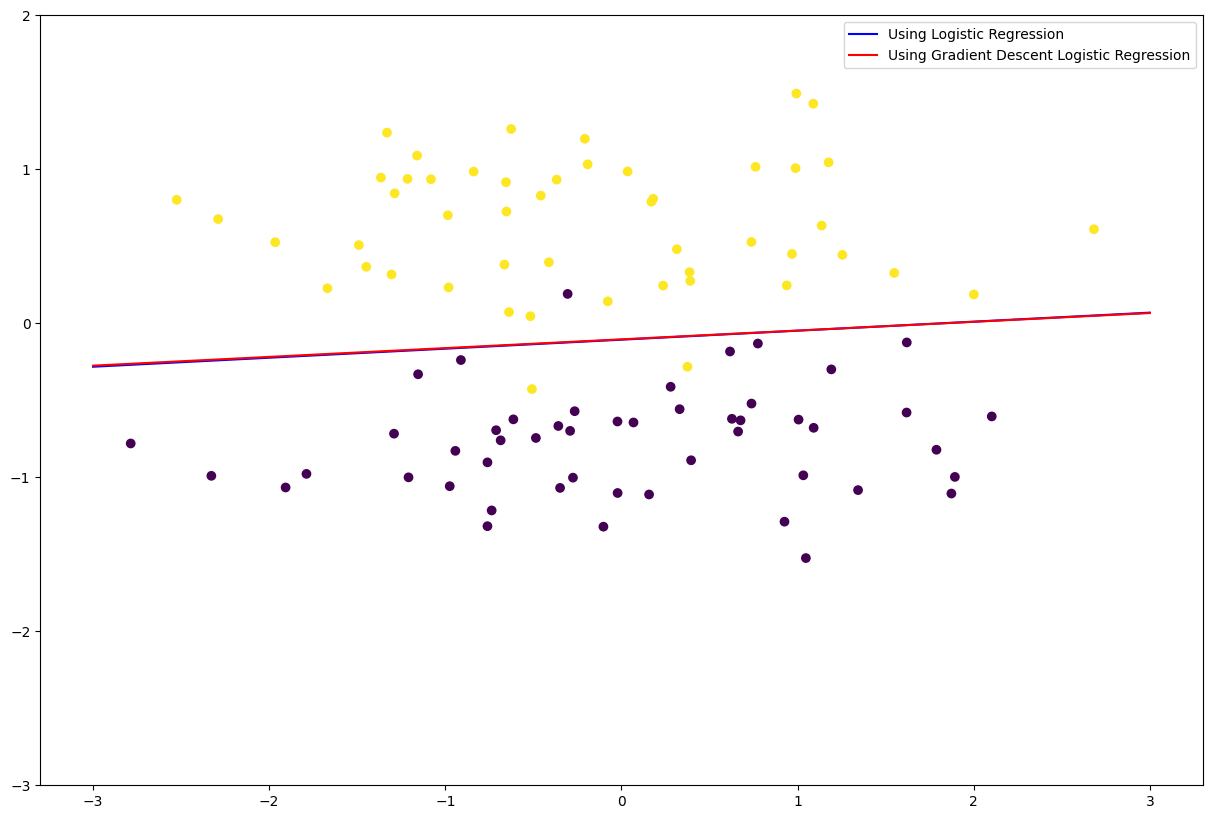

In [338]:
# Now plotting the line with the Logistic Regression line
plt.figure(figsize=(15,10))
plt.plot(x_in_lor,y_in_lor,label='Using Logistic Regression',color='blue')
plt.plot(x_in_gdlor,y_in_gdlor,label='Using Gradient Descent Logistic Regression',color='red')
plt.scatter(X[:,0],X[:,1:],c=y)
plt.ylim(-3,2)
plt.legend()
plt.show()